In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import os
import matplotlib.ticker as ticker
dpi = 50
fs = 15

workdir = '/Users/diana/Dropbox/UW/Research/rasm/rasm_project_meeting_oct2016/'

import data

In [2]:
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [3]:
months = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
rasm11_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                             'fluxes_hourlyrun_monthly.1948-09.nc'))
month_nums = ['09', '10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08']
# rasm11_output_months = rasm11_output.groupby('time.month').mean('time')
mnth_avg = [30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31]

In [4]:
'''i = 0
coupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[0]
coupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                              coupler_file))
coupler_runoff = coupler_output['x2lavg_Sa_tbot'] - 273.15
output_runoff = rasm11_output['OUT_AIR_TEMP'].isel(time=(i))'''

"i = 0\ncoupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[0]\ncoupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', \n                                              coupler_file))\ncoupler_runoff = coupler_output['x2lavg_Sa_tbot'] - 273.15\noutput_runoff = rasm11_output['OUT_AIR_TEMP'].isel(time=(i))"

In [5]:
# (coupler_runoff - output_runoff.to_masked_array()).plot()

RASM 1.1 Output to Coupler Fields: Temperature. x2lavg_Sa_tbot in K (converted to C), OUT_AIR_TEMP in C. 

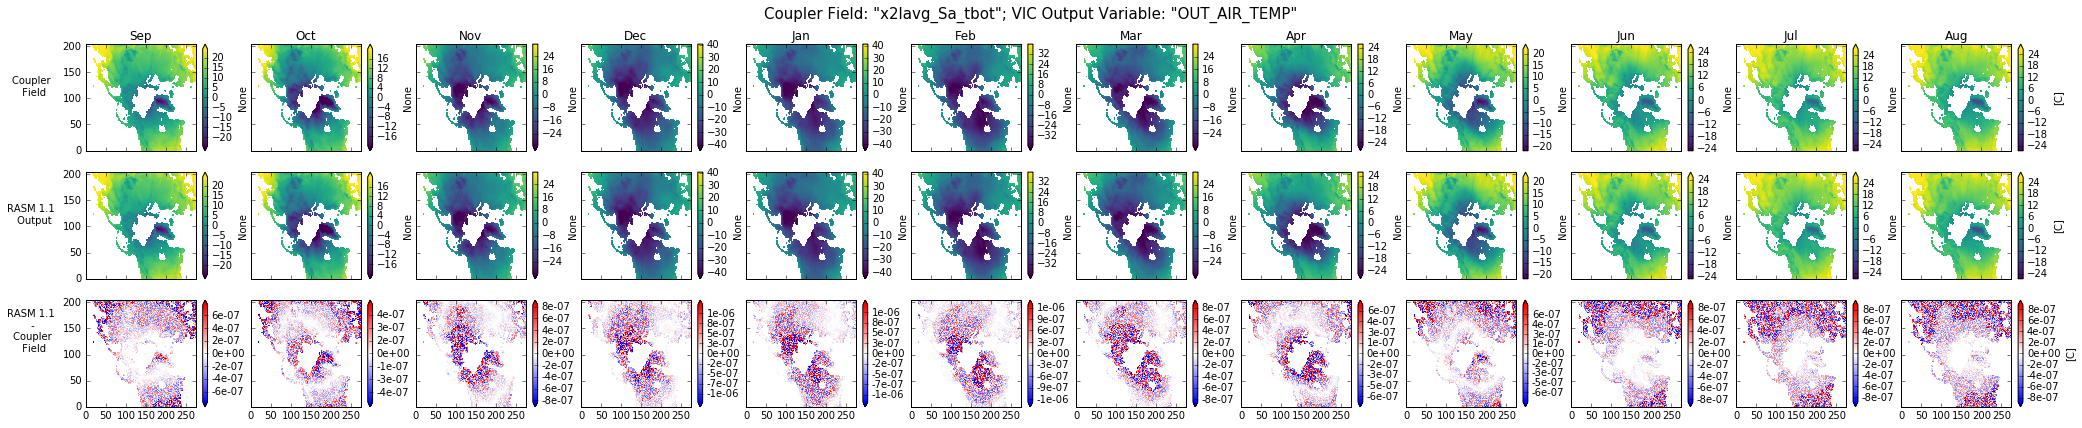

In [15]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
formatt = '%.0e'
count1 = 0
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('Coupler \n Field', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n Coupler \n Field', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        cbar_kwargs = {'label': '[C]' if i == 11 else None}
        coupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[i]
        coupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                                      coupler_file))
        coupler_runoff = coupler_output['x2lavg_Sa_tbot'] - 273.15
        coupler_runoff.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs=cbar_kwargs, 
                           robust=True)
    elif i >= 12 and i < 24: 
        cbar_kwargs = {'label': '[C]' if i == 23 else None}
        output_runoff = rasm11_output['OUT_AIR_TEMP'].isel(time=(i-12))
        output_runoff.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs=cbar_kwargs, 
                           robust=True)
    else: 
        cbar_kwargs = {'format': formatt, 'label': '[C]'} if i == 35 else {'format': formatt}
        coupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[i-24]
        coupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                                      coupler_file))
        coupler_runoff = coupler_output['x2lavg_Sa_tbot'] - 273.15
        output_runoff = rasm11_output['OUT_AIR_TEMP'].isel(time=(i-24))
        difference = coupler_runoff - output_runoff.to_masked_array()
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs=cbar_kwargs, 
                           robust=True)
fig.suptitle('Coupler Field: "x2lavg_Sa_tbot"; VIC Output Variable: "OUT_AIR_TEMP"', size=fs)
plotname = 'temp_rasm1.1_coupled_field.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

RASM 1.1 Output to Coupler Fields: Precip. x2lavg_Faxs_rainc, rainl, snowc, snowl in kg m-2 s-1 (converted to mm/time step), OUT_PREC in mm/time step. 

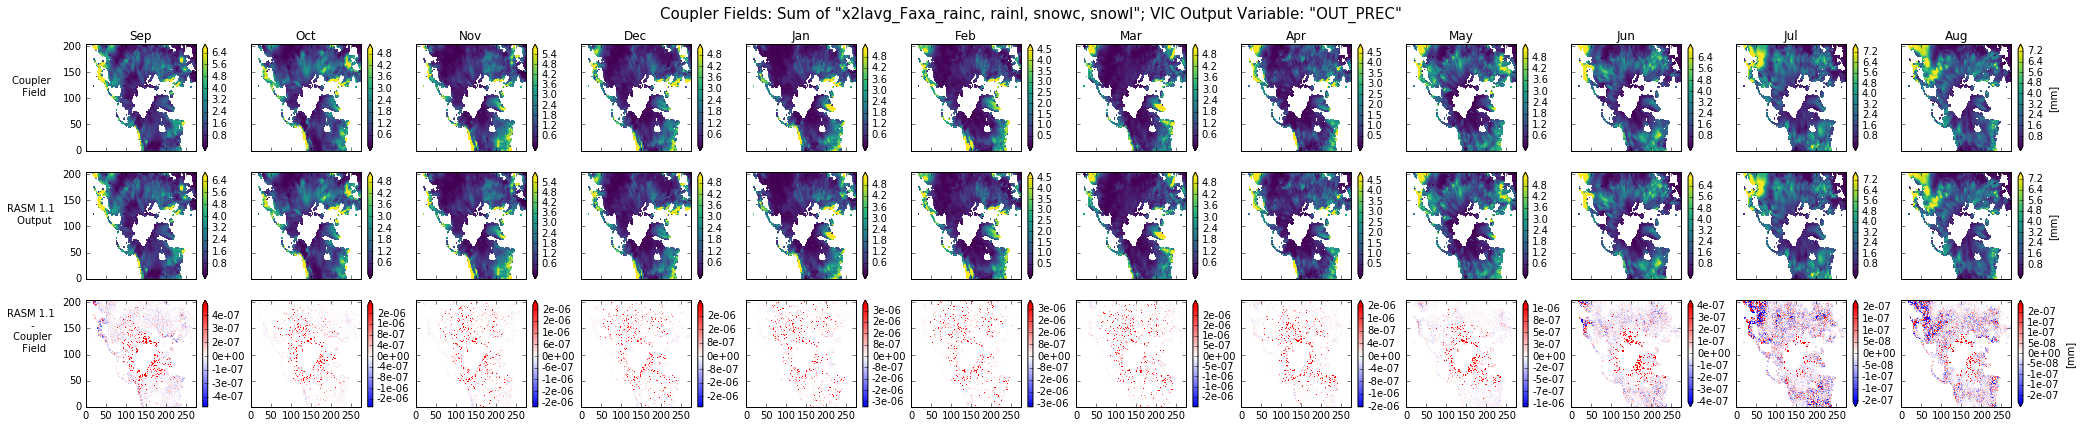

In [16]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
count1 = 0
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('Coupler \n Field', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n Coupler \n Field', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        coupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[i]
        coupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                                      coupler_file))
        precip_coupled = coupler_output['x2lavg_Faxa_rainc'] + \
                           coupler_output['x2lavg_Faxa_rainl'] + \
                           coupler_output['x2lavg_Faxa_snowc'] + \
                           coupler_output['x2lavg_Faxa_snowl']
        precip_converted = precip_coupled * 86400
        precip_converted.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        output_precip = (rasm11_output['OUT_PREC'].isel(time=(i-12))) / mnth_avg[i-12]
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 23 else None, 
                           robust=True)
    else: 
        cbar_kwargs = {'format': formatt, 'label': '[mm]'} if i == 35 else {'format': formatt}
        coupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[i-24]
        coupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                                      coupler_file))
        precip_coupled = coupler_output['x2lavg_Faxa_rainc'] + \
                           coupler_output['x2lavg_Faxa_rainl'] + \
                           coupler_output['x2lavg_Faxa_snowc'] + \
                           coupler_output['x2lavg_Faxa_snowl']
        precip_converted = precip_coupled * 86400
        output_precip = (rasm11_output['OUT_PREC'].isel(time=(i-24)) / mnth_avg[i-24]).to_masked_array()
        difference = precip_converted - output_precip
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs=cbar_kwargs, 
                           robust=True)
fig.suptitle('Coupler Fields: Sum of "x2lavg_Faxa_rainc, rainl, snowc, snowl"; VIC Output Variable: "OUT_PREC"', size=fs)
plotname = 'precip_rasm1.1_coupled_field.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

RASM 1.1 Output to Coupler Fields: Pressure. x2lavg_Sa_pbot in Pa (converted to kPa), OUT_PRESSURE in kPa

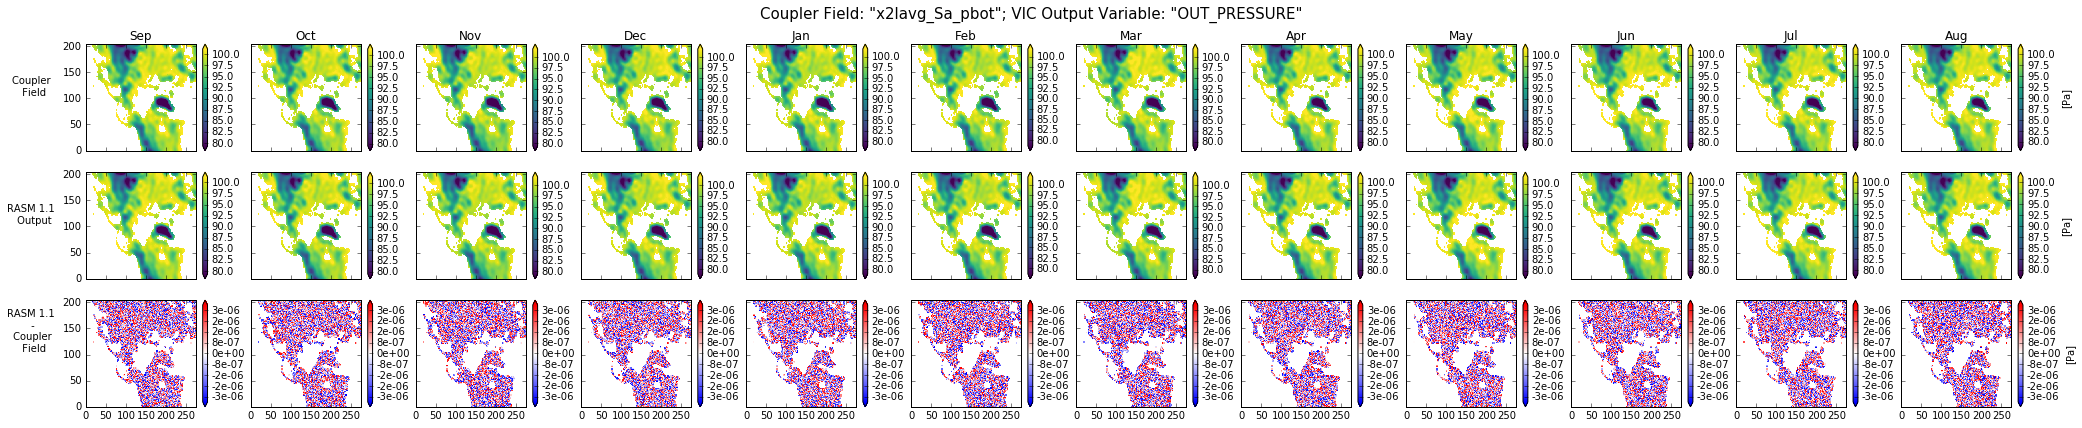

In [23]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
count1 = 0
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('Coupler \n Field', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n Coupler \n Field', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        coupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[i]
        coupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                                      coupler_file))
        coupler_runoff = coupler_output['x2lavg_Sa_pbot'] / 1000.0 
        coupler_runoff.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[Pa]'} if i == 11 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        output_runoff = rasm11_output['OUT_PRESSURE'].isel(time=(i-12)) * 1000
        output_runoff.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[Pa]'} if i == 23 else None, 
                           robust=True)
    else: 
        cbar_kwargs = {'format': formatt, 'label': '[Pa]'} if i == 35 else {'format': formatt}
        coupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[i-24]
        coupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                                      coupler_file))
        difference = (coupler_output['x2lavg_Sa_pbot'] / 1000.0) - \
                              (rasm11_output['OUT_PRESSURE'].isel(time=(i-24)).to_masked_array() * 1000)
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs=cbar_kwargs, 
                           robust=True)
fig.suptitle('Coupler Field: "x2lavg_Sa_pbot"; VIC Output Variable: "OUT_PRESSURE"', size=fs)
plotname = 'pressure_rasm1.1_coupled_field.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

RASM 1.1 Output to Coupler Fields: Pressure. (x2lavg_Sa_u^2 + x2lavg_Sa_v^2)^0.5 in m/s, OUT_WIND in m/s

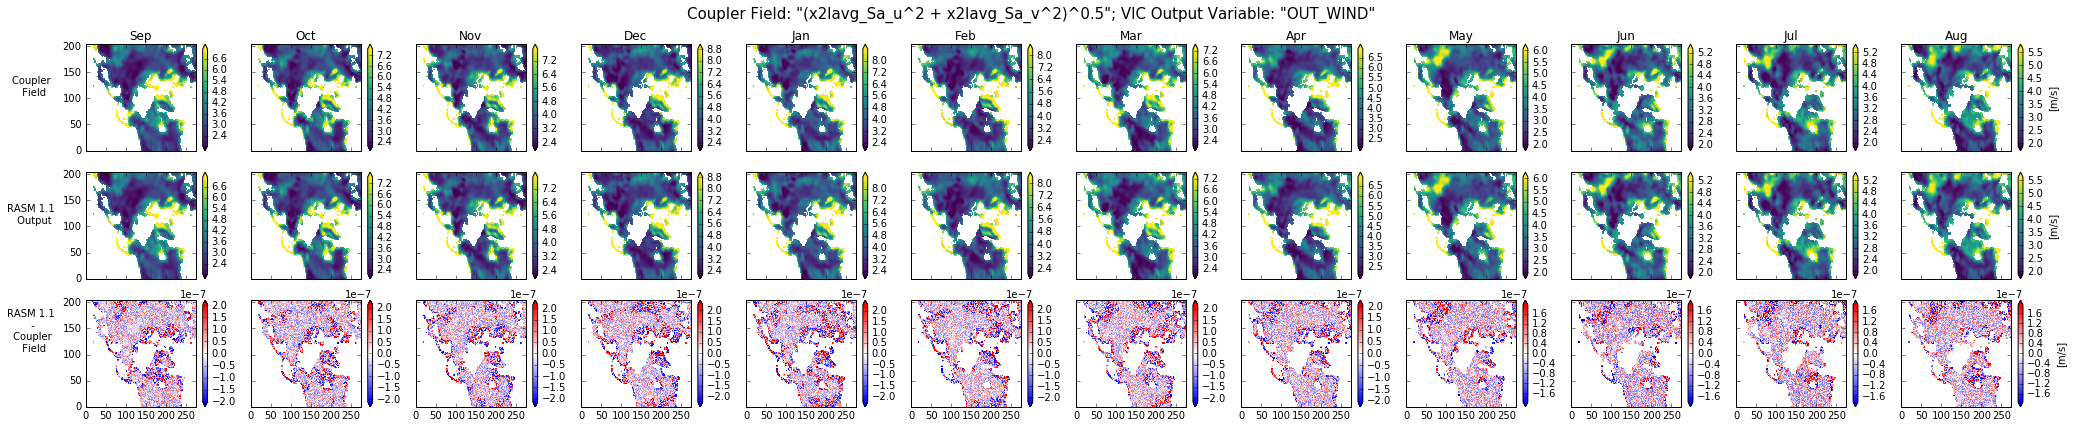

In [22]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
count1 = 0
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('Coupler \n Field', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n Coupler \n Field', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        coupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[i]
        coupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                                      coupler_file))
        coupler_runoff = ((coupler_output['x2lavg_Sa_u']**2) + \
                         (coupler_output['x2lavg_Sa_v']**2)) ** 0.5
        coupler_runoff.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[m/s]'} if i == 11 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        output_runoff = rasm11_output['OUT_WIND'].isel(time=(i-12))
        output_runoff.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[m/s]'} if i == 23 else None, 
                           robust=True)
    else: 
        cbar_kwargs = {'format': formatt, 'label': '[m/s]'} if i == 35 else {'format': formatt}
        coupler_file = 'vic5.RI.test.20161110a.cpl.ha.1949-%s.nc' % month_nums[i-24]
        coupler_output = xr.open_dataset(os.path.join(workdir, 'rasm_data_atm', 
                                                      coupler_file))
        coupler_runoff = ((coupler_output['x2lavg_Sa_u']**2) + \
                         (coupler_output['x2lavg_Sa_v']**2)) ** 0.5
        difference = coupler_runoff - \
                              (rasm11_output['OUT_WIND'].isel(time=(i-24)).to_masked_array())
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[m/s]'} if i == 35 else None, 
                           robust=True)
fig.suptitle('Coupler Field: "(x2lavg_Sa_u^2 + x2lavg_Sa_v^2)^0.5"; VIC Output Variable: "OUT_WIND"', size=fs)
plotname = 'wind_rasm1.1_coupled_field.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')

RASM 1.1 Uncoupled fields: LW DOWN

RASM 1.1: Coupled field - output: LATENT HEAT (x2aavg_Faxx_evap - OUT_LATENT)

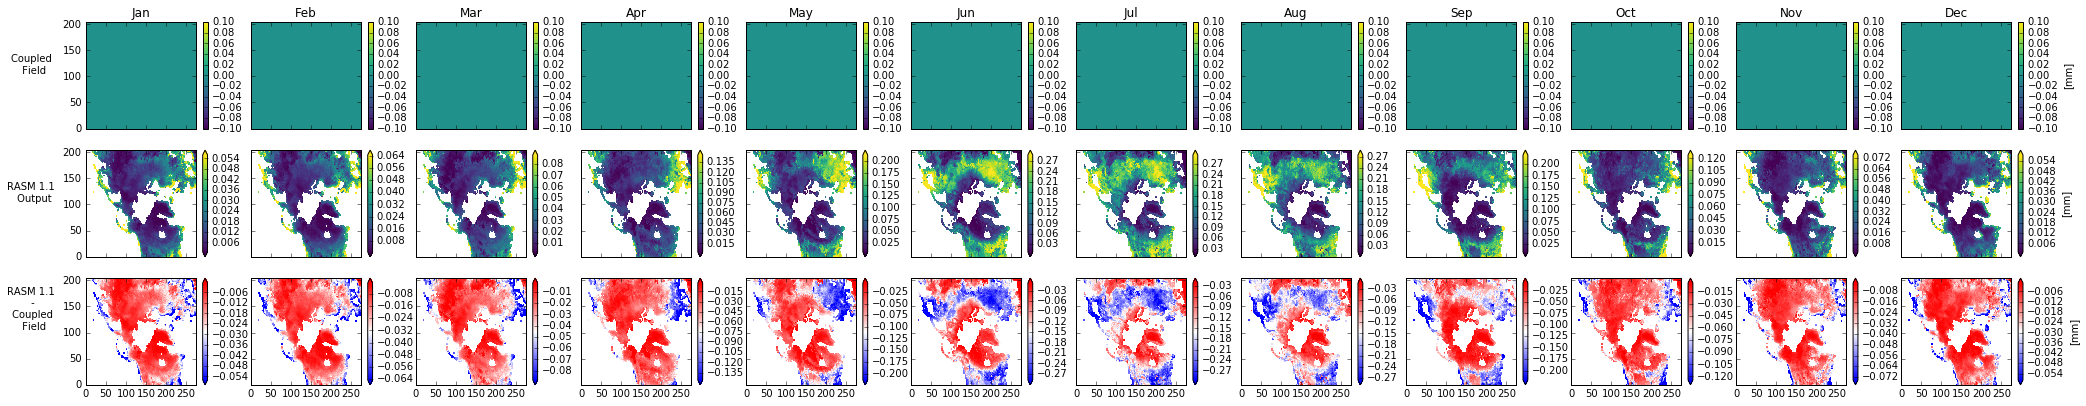

In [4]:
fig, axs = plt.subplots(3,12, figsize=(35, 6.5))
lp = 30
for i, axes in enumerate(axs.ravel()): 
    if i  < 24:
        axes.xaxis.set_ticklabels([])
    if i != 0 and i != 12 and i != 24:
        axes.yaxis.set_ticklabels([])
    if i == 0:
        axes.set_ylabel('Coupler \n Field', rotation='horizontal', labelpad=lp)
    elif i == 12: 
        axes.set_ylabel('RASM 1.1 \n Output', rotation='horizontal', labelpad=lp)
    elif i == 24: 
        axes.set_ylabel('RASM 1.1 \n - \n Coupler \n Field', rotation='horizontal', labelpad=lp)
    if i < 12: 
        axes.set_title(months[i])
    if i < 12: 
        lh_coupled = coupler_output['x2aavg_Faxx_evap'].isel(time=i) * 3600
        lh_coupled.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 11 else None, 
                           robust=True)
    elif i >= 12 and i < 24: 
        output_precip = (rasm11_output_months['OUT_EVAP'].isel(month=(i-12))) / 24.0
        output_precip.plot(cmap='viridis', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 23 else None, 
                           robust=True)
    else: 
        lh_coupled = coupler_output['x2aavg_Faxx_evap'].isel(time=i-24) * 3600
        output_precip = (rasm11_output_months['OUT_EVAP'].isel(month=(i-24)) / 24.0).to_masked_array()
        difference = lh_coupled - output_precip
        difference.plot(cmap='bwr', ax=axes, 
                           add_labels=False, 
                           add_colorbar=True, 
                           cbar_kwargs={'label': '[mm]'} if i == 35 else None, 
                           robust=True)
plotname = 'evap_rasm1.1_coupled_field.png'
plot_direc = os.path.join(workdir, 'plots')
if not os.path.exists(plot_direc):
    os.makedirs(plot_direc)
savepath = os.path.join(plot_direc, plotname)
plt.savefig(savepath, format='png', dpi=dpi, bbox_inches='tight')